# Data engineering challenge

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Discover the data

Comma instead of dot -> Solved by 'decimal='.

Characters not recognised -> Solved by renaming.

Duplicates -> solved by replacing.

In [6]:
# read .csv file
ku = pd.read_csv('Kuendigungen_2017.csv', sep=';', decimal=',')
ku.columns.values[4] = 'Jahre_Firmenzugehoerigkeit'
ku.columns.values[9] = 'hat_gekuendigt_2017'
ku = ku.replace('Produkt-Management', 'Produktmanagement')

In [5]:
# print data frame
ku

,Zufriedenheit_MA_Befragung,Performance_letztesJahr,Anzahl_Projekte_letztesJahr,Arbeitsstunden_Monat_Schnitt,Jahre_Firmenzugehoerigkeit,Hatte_Betriebsunfall,Befoerderung_letzte3Jahre,Bereich,Gehaltsgruppe,hat_gekuendigt_2017
0,0.38,0.53,2,157,3,0,0,Vertrieb,1,1
1,0.80,0.86,5,262,6,0,0,Vertrieb,2,1
2,0.11,0.88,7,272,4,0,0,Vertrieb,2,1
3,0.72,0.87,5,223,5,0,0,Vertrieb,1,1
4,0.37,0.52,2,159,3,0,0,Vertrieb,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,Kundensupport,1,1
14995,0.37,0.48,2,160,3,0,0,Kundensupport,1,1
14996,0.37,0.53,2,143,3,0,0,Kundensupport,1,1
14997,0.11,0.96,6,280,4,0,0,Kundensupport,1,1


# Not everyone answered the survey (14987 < 14999)
# Nan: not a number

In [7]:
# quick view of the data
ku.describe()

,Zufriedenheit_MA_Befragung,Performance_letztesJahr,Anzahl_Projekte_letztesJahr,Arbeitsstunden_Monat_Schnitt,Jahre_Firmenzugehoerigkeit,Hatte_Betriebsunfall,Befoerderung_letzte3Jahre,Gehaltsgruppe,hat_gekuendigt_2017
count,14987.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612902,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,1.594706,0.238083
std,0.248628,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.637183,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,1.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,2.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,2.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,3.000000,1.000000


In [8]:
# one example of what is wrong and where
incomp = ku['Zufriedenheit_MA_Befragung']
loc_odd, = np.where(incomp.isnull())
# print('size:', loc_odd.size, '\n')
# print(loc_odd, '\n')
incomp[150:160]

150    0.11
151    0.45
152    0.37
153    0.40
154     NaN
155    0.11
156    0.83
157    0.11
158    0.39
159    0.45
Name: Zufriedenheit_MA_Befragung, dtype: float64

# We can notice clusters in the representation

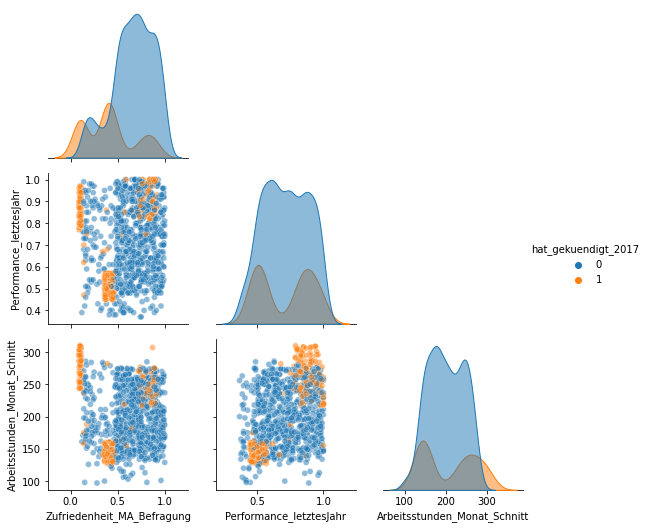

In [9]:
# attempt to see reason why people resign

kur = ku.loc[np.random.choice(ku.index, 1000, replace=False)]
visu = sns.PairGrid(kur, diag_sharey=False, corner=True,
   vars=['Zufriedenheit_MA_Befragung',
         'Performance_letztesJahr',
         'Arbeitsstunden_Monat_Schnitt',
        ], hue='hat_gekuendigt_2017')
        
#'Bereich'
#'Gehaltsgruppe'       
#'Befoerderung_letzte3Jahre'
#'Hatte_Betriebsunfall'
#'Jahre_Firmenzugehoerigkeit'
#'Anzahl_Projekte_letztesJahr'

visu.map_diag(sns.kdeplot, alpha=0.5, fill=True)
visu.map_offdiag(sns.scatterplot, alpha=0.5)
visu.add_legend()
visu.savefig('cor.pdf')


In [10]:
# number of people who resigned from where
item = ku.columns.tolist()
resignedOrNotWhere = ku.groupby([item[-1], item[-3]])
resignedWhere = resignedOrNotWhere.size()[1]
resigned = ku.groupby(item[-1]).size()
total = resigned.sum()
peopleByDomain = ku.groupby(item[-3]).size()
total =resignedOrNotWhere.size().sum()

In [11]:
pd.DataFrame([resigned.values, 100*resigned/total],
   columns=['geblieben', 'gekündigt'],
   index=['Zahl', '%']).T

,Zahl,%
geblieben,11428.0,76.191746
gekündigt,3571.0,23.808254


In [13]:
resignedTab = pd.DataFrame([resignedWhere,
                            peopleByDomain, 
                            100*resignedWhere/peopleByDomain],
                            index=['gekündigt', 'Personen', '%']).T
resignedTab.sort_values(by=['%'])

,gekündigt,Personen,%
Bereich,,,
Management,91.0,630.0,14.444444
Entwicklung,121.0,787.0,15.374841
Produktmanagement,198.0,902.0,21.951220
IT,273.0,1227.0,22.249389
Marketing,203.0,858.0,23.659674
Vertrieb,1014.0,4140.0,24.492754
Kundensupport,555.0,2229.0,24.899058
Techniker,697.0,2720.0,25.625000
Buchhaltung,204.0,767.0,26.597132


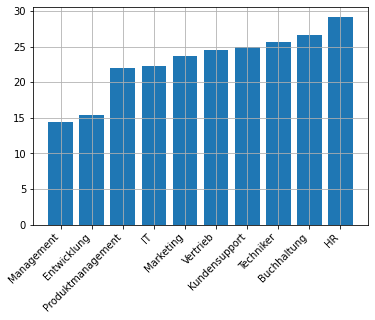

In [14]:
plt.xticks(rotation=45, ha='right')
resignedPlot = resignedTab.sort_values(by=['%'])['%']
plt.bar(resignedPlot.index, height=resignedPlot)
plt.grid(True)
plt.savefig('gek.pdf')

In [15]:
# numbers of working hours per person

hoursByDomain = ku.groupby([item[-3]]).sum()[item[3]]
tabHoursPeople = pd.DataFrame([hoursByDomain,
                                peopleByDomain,
                                hoursByDomain/peopleByDomain], 
                              index=['Sum_St_Pro_Mo', 'Personen', 'St./P.']).T
tabHoursPeople

,Sum_St_Pro_Mo,Personen,St./P.
Bereich,,,
Buchhaltung,154292.0,767.0,201.162973
Entwicklung,158030.0,787.0,200.800508
HR,146828.0,739.0,198.684709
IT,248119.0,1227.0,202.215974
Kundensupport,447490.0,2229.0,200.758188
Management,126787.0,630.0,201.249206
Marketing,171073.0,858.0,199.385781
Produktmanagement,180369.0,902.0,199.965632
Techniker,550793.0,2720.0,202.497426


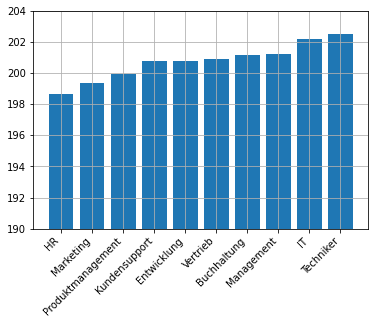

In [16]:

plotHoursPeople = tabHoursPeople.sort_values(by=['St./P.'])['St./P.']
plt.xticks(rotation=45, ha='right')
plt.ylim(190, 204)
plt.bar(plotHoursPeople.index, height=plotHoursPeople)
plt.grid(True)
plt.savefig('work.pdf')